<a href="https://colab.research.google.com/github/Anonymous1846/ALL-Detection-Using-CNN/blob/master/ALL_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing All The Necessary Dependancies.**

In [19]:
#importing all the required dependencies 
#keras act as an interface for python ai(Tensorflow libs)
import keras
#validating the keras installation !
#The problem with Deep Learning is that we require a lot of data
from keras.preprocessing.image import ImageDataGenerator
#import matlabplotlib for plotting purposes !
import matplotlib.pyplot as plt
'''for building the cnn model for binary and multiple classification !
The layers for multiple layers are also imported'''
import os 
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from keras.preprocessing import image
import random
from PIL import Image
import tensorflow as tf

print(keras.__version__)

2.4.3


# **Loading the Dataset(i.e Cancer cell images).**

In [2]:
#the path to the cancer and normal datasets
training_data_path="/content/drive/MyDrive/Deep Learning/Datasets"
print(f'The images loaded from path :{training_data_path}')
#the training and testing data are in sepearte directories of the same driv
normal_data=os.listdir('/content/drive/MyDrive/Deep Learning/Datasets/Normal')
cancer_data=os.listdir('/content/drive/MyDrive/Deep Learning/Datasets/Blasts')
#printing the number of cancer and normal data cancer cells
print(f'The number of cancer cells : {len(cancer_data)}\nThe number of normal data : {len(normal_data)}')

The images loaded from path :/content/drive/MyDrive/Deep Learning/Datasets
The number of cancer cells : 179
The number of normal data : 155


# **Image Preprocessing**

In [7]:
'''The image dataset contains roughly 334 images, but the main problem is that it is insufficient 
for deep learning training, so inorder to rectify that we use the ImageDataGenerator to generate 
images from the pre-exisiting images ! the below function will genearte the new images based on the paramters
provided to that function'''
training_images_preprocessed=ImageDataGenerator(rescale=1./255,rotation_range=40)


# **Applying the changes to the images from the directory !**

In [8]:
training_images_datagen=training_images_preprocessed.flow_from_directory(
        training_data_path,  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')


Found 334 images belonging to 2 classes.


# **Representation of Images.**

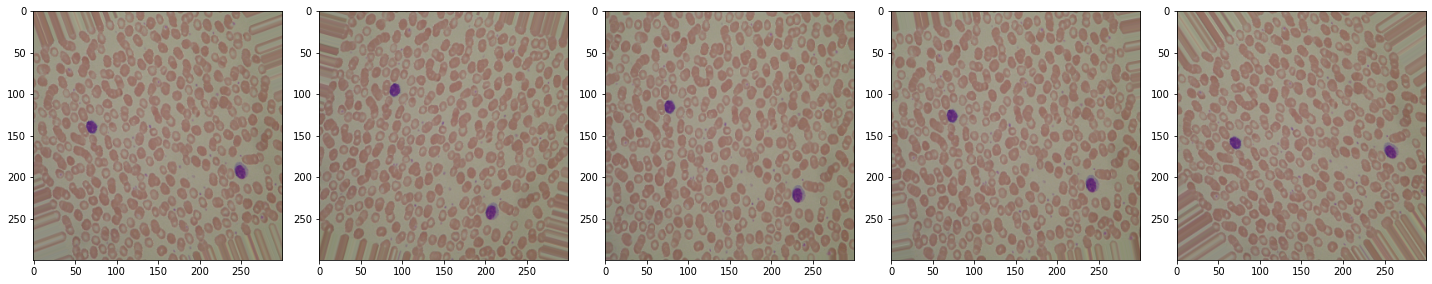

In [9]:
#plotting the images ! After the augemntation !
def plot(image):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for imag,axis in zip(image,axes):
    #the zip function takes two params(iteratables and combines then to form a list of tuples !)
    axis.imshow(imag)
  plt.tight_layout()
  plt.show()

training_images_datagen.class_indices
sample_images=[training_images_datagen[0][0][0] for i in range(5)]
plot(sample_images)

# **Building the CNN Deep Learning Model**

In [10]:
#the classification model output will e categorical !
#list of the deep learning layers added to the model for training !
#five layers for the model
the_binary_cnn_model=Sequential([
                                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                                    MaxPooling2D(2, 2),
                                    # The second convolution
                                    Conv2D(32, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The third convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The fourth convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # The fifth convolution
                                    Conv2D(64, (3,3), activation='relu'),
                                    MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    Flatten(),
                                    # 512 neuron hidden layer
                                    Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('normal') and 0 for the other 'cancer'
                                    Dense(1, activation='sigmoid')
                                        ])

print(the_binary_cnn_model)

# **Model Overview**

In [11]:
the_binary_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

# **Compile the model**

In [12]:
#applying the optimizers
#judging based on the accuracy !
the_binary_cnn_model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# **Training the model based on the above model !**

In [13]:
#the steps per epoch is set to 2, but cannot be set to more than 3(because of error !)
the_final_train = the_binary_cnn_model.fit(

                      training_images_datagen,
                      batch_size=10,
                      steps_per_epoch=3,  
                      epochs=100,
                      verbose=1,
                    )

Epoch 1/100
3/3 [==============================] - 88s 38s/step - loss: 0.7540 - accuracy: 0.5094
Epoch 2/100
3/3 [==============================] - 13s 4s/step - loss: 0.6858 - accuracy: 0.5397
Epoch 3/100
3/3 [==============================] - 13s 4s/step - loss: 0.6647 - accuracy: 0.6671
Epoch 4/100
3/3 [==============================] - 13s 4s/step - loss: 1.1987 - accuracy: 0.5506
Epoch 5/100
3/3 [==============================] - 13s 5s/step - loss: 0.6327 - accuracy: 0.6263
Epoch 6/100
3/3 [==============================] - 13s 4s/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
3/3 [==============================] - 13s 4s/step - loss: 0.5806 - accuracy: 0.6704
Epoch 8/100
3/3 [==============================] - 13s 4s/step - loss: 0.6227 - accuracy: 0.6599
Epoch 9/100
3/3 [==============================] - 13s 4s/step - loss: 0.5520 - accuracy: 0.6963
Epoch 10/100
3/3 [==============================] - 13s 5s/step - loss: 0.7765 - accuracy: 0.6736
Epoch 11/100
3/3 [==========

#**Testing for Cancer vs Normal**

In [20]:
def check_for_cancer(image_path):
  img = image.load_img(image_path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = the_binary_cnn_model.predict(images, batch_size=10)
  if classes[0]<0.5:
      return "Cancer cell"
  else:
      return "Normal cell"
#the five conditions for checking the cancer and normal cells !

#checking for cancer/not !
#cancerous !
# Load image 

print(check_for_cancer('/content/drive/MyDrive/Deep Learning/Cancer.jpg'))
#ought to be normal 
print(check_for_cancer('/content/drive/MyDrive/Deep Learning/Normal.tif'))

Cancer cell
Normal cell
